In [37]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [38]:
iris = load_iris()

In [39]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = pd.Series(iris.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [40]:
X = df.drop(["target"], axis=1).values 
y = df["target"].values
y=to_categorical(y)

In [41]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [42]:
model = Sequential()

model.add(Dense(10,input_shape=(4,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 21        
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


In [43]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.33)

Epoch 1/100
3/3 [==============================] - 1s 114ms/step - loss: 1.2896 - accuracy: 0.3930 - val_loss: 1.1902 - val_accuracy: 0.3000
Epoch 2/100
3/3 [==============================] - 0s 28ms/step - loss: 1.0171 - accuracy: 0.4578 - val_loss: 1.0731 - val_accuracy: 0.6500
Epoch 3/100
3/3 [==============================] - 0s 27ms/step - loss: 1.0464 - accuracy: 0.6922 - val_loss: 1.0250 - val_accuracy: 0.6500
Epoch 4/100
3/3 [==============================] - 0s 27ms/step - loss: 0.9726 - accuracy: 0.6844 - val_loss: 0.9361 - val_accuracy: 0.6500
Epoch 5/100
3/3 [==============================] - 0s 23ms/step - loss: 0.8213 - accuracy: 0.7328 - val_loss: 0.7475 - val_accuracy: 0.6500
Epoch 6/100
3/3 [==============================] - 0s 29ms/step - loss: 0.7484 - accuracy: 0.6125 - val_loss: 0.6763 - val_accuracy: 0.9500
Epoch 7/100
3/3 [==============================] - 0s 24ms/step - loss: 0.6695 - accuracy: 0.8555 - val_loss: 0.7536 - val_accuracy: 0.6500
Epoch 8/100
3/3 [==

In [45]:
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)

ValueError: ignored

In [28]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test_class,y_pred_class)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [30]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


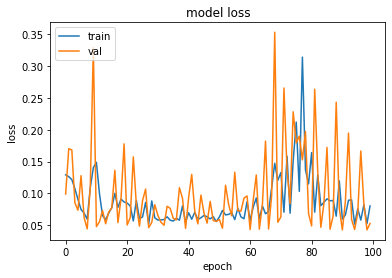

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

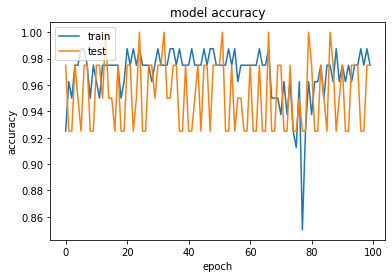

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

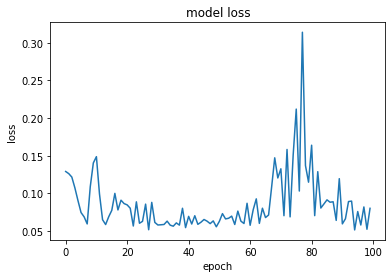

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()